In [1]:
from solver.jps import JPS
from solver.jpsplus import JPSPlus
from solver.astar import AStar
from solver.base import findPathBase
from solver.pruning.base import NoPruning
from solver.pruning.bbox import BBoxPruning

from utils.distance import diagonalDistance

from container.open import OpenList
from container.closed import ClosedList

from evaluation.test import simpleTest

from graph.node import Node
from graph.grid import GridMap

from utils.visualisation import drawResult
from evaluation.movingai import MovingAIDataset

In [2]:
import pandas as pd

easy = MovingAIDataset(
    'data/maps/lak307d.map',
    'data/scen/lak307d.map.scen'
)
hard = MovingAIDataset(
    'data/maps/ost002d.map',
    'data/scen/ost002d.map.scen'
)

In [3]:
result_easy = {
    algo.__name__: {
        prune.__name__: pd.DataFrame(easy.test(algo, diagonalDistance, findPathBase, prune))
        for prune in (NoPruning, BBoxPruning)
    }
    
    for algo in (AStar, JPS, JPSPlus)
}

Process the tasks: 100%|██████████| 200/200 [00:00<00:00, 4812.30it/s]


In [82]:
result_hard = {
    algo.__name__: {
        prune.__name__: pd.DataFrame(hard.test(algo, diagonalDistance, findPathBase, prune))
        for prune in (NoPruning, BBoxPruning)
    }
    
    for algo in (AStar, JPS, JPSPlus)
}

Process the tasks: 100%|██████████| 610/610 [00:07<00:00, 78.93it/s]  


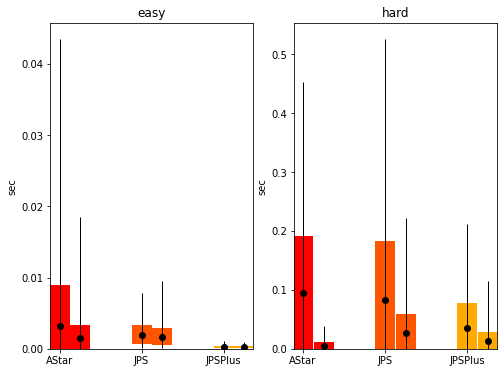

In [127]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.pyplot as plt

cmap = cm.autumn
norm = Normalize(vmin=0, vmax=3)
fig, axes = plt.subplots(1, 2, figsize=(8,6))

for ax, data, name in zip(axes, (result_easy, result_hard), ('easy', 'hard')):
    for i, algo in enumerate(data):
        for j, pr in enumerate(data[algo]):
            stats = data[algo][pr].describe()['time']
            ax.errorbar(
                [i+j*0.25],
                [stats['mean']],
                [stats['std']],
                fmt='ok', lw=20,
                ecolor=cmap(norm(i)),
            )
            ax.errorbar(
                [i+j*0.25], [stats['mean']],
                [[stats['mean'] - stats['min']], [stats['max'] - stats['mean']]],
                fmt='.k', ecolor=None, lw=1,
            )
    ax.set_title(name)
    ax.set_ylim(0)
    ax.set_ylabel('sec')
    ax.set_xticks([i for i in range(len(data))]);
    ax.set_xticklabels([algo for algo in data]);

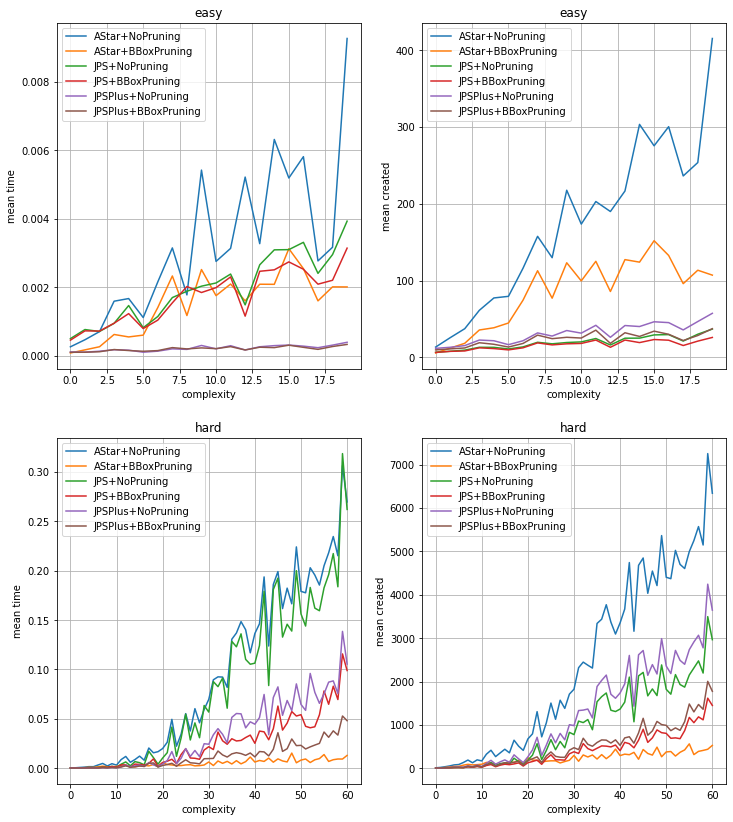

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(12,14))

for ax, data, name in zip(axes, (result_easy, result_hard), ('easy', 'hard')):
    for algo in data:
        for pr in data[algo]:
            
            means = data[algo][pr].groupby('complex').mean()
            
            for i, datatype in enumerate(('time', 'created')):
                ax[i].plot(
                    means[datatype],
                    label=f'{algo}+{pr}'
                )
                
    for i, datatype in enumerate(('time', 'created')):
                
        ax[i].set_ylabel(f'mean {datatype}')
        ax[i].set_xlabel('complexity')
        ax[i].grid(True)
        ax[i].legend();
        ax[i].set_title(name)

In [2]:
height = 15
width = 30
mapstr = '''

. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 7
jStart = 1
iGoal = 13
jGoal = 28

In [3]:
startNode = Node(iStart, jStart)
goalNode = Node(iGoal, jGoal)
grid = GridMap().readFromString(mapstr, width, height)

### BBoxPruning

Preprocess the map: 100%|██████████| 450/450 [00:04<00:00, 90.61it/s] 


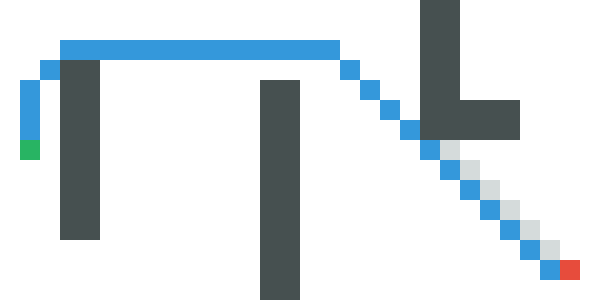

{'time': 0.0006263109999995464,
 'found': True,
 'length': 35.38477631085024,
 'created': 37,
 'complex': 0}

In [4]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList, visualise=True)

Preprocess the map: 100%|██████████| 450/450 [00:05<00:00, 88.38it/s] 


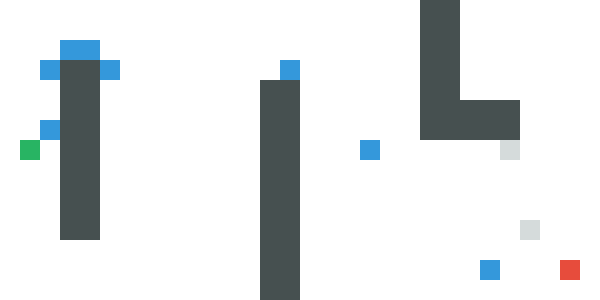

{'time': 0.001744266999999411,
 'found': True,
 'length': 35.384776310850235,
 'created': 12,
 'complex': 0}

In [5]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

Preprocess the map: 100%|██████████| 450/450 [00:05<00:00, 89.01it/s] 


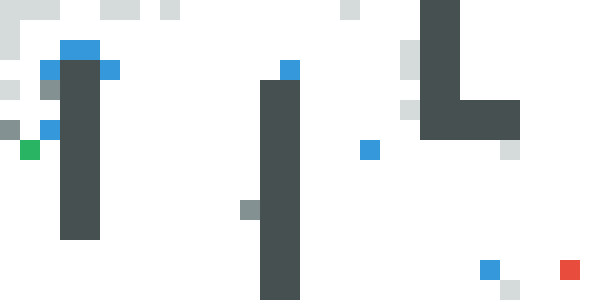

{'time': 0.00037253300000017475,
 'found': True,
 'length': 35.384776310850235,
 'created': 28,
 'complex': 0}

In [6]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

### NoPruning

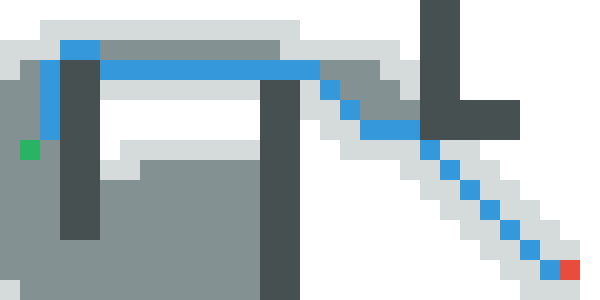

{'time': 0.012632375999999113,
 'found': True,
 'length': 35.384776310850235,
 'created': 218,
 'complex': 0}

In [7]:
prune = NoPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

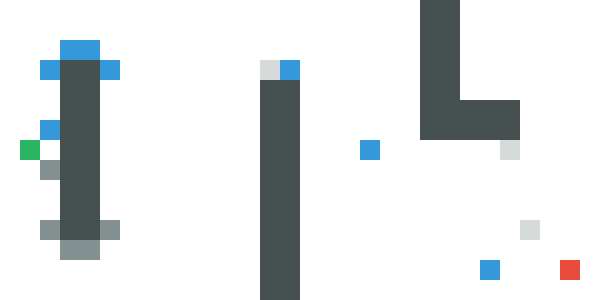

{'time': 0.006957010000000707,
 'found': True,
 'length': 35.384776310850235,
 'created': 18,
 'complex': 0}

In [8]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

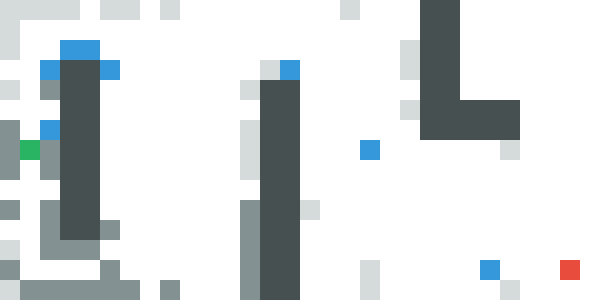

{'time': 0.0007160060000011015,
 'found': True,
 'length': 35.384776310850235,
 'created': 63,
 'complex': 0}

In [9]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

In [10]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # . # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 6
jGoal = 24

In [11]:
startNode = Node(iStart, jStart)
goalNode = Node(iGoal, jGoal)
grid = GridMap().readFromString(mapstr, width, height)

### BBox Pruning

Preprocess the map: 100%|██████████| 450/450 [00:04<00:00, 95.80it/s] 


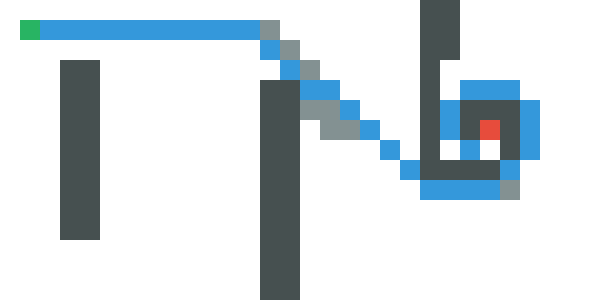

{'time': 0.000946360000000368,
 'found': True,
 'length': 39.79898987322333,
 'created': 43,
 'complex': 0}

In [12]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

Preprocess the map: 100%|██████████| 450/450 [00:05<00:00, 89.45it/s] 


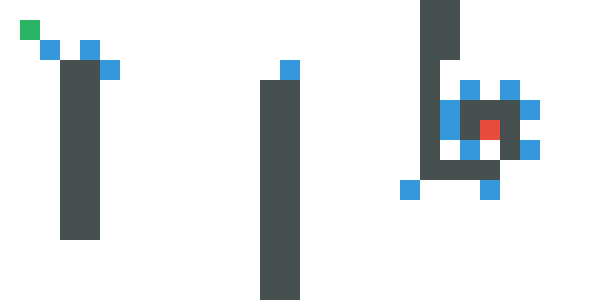

{'time': 0.002395960999997726,
 'found': True,
 'length': 39.79898987322332,
 'created': 15,
 'complex': 0}

In [13]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

Preprocess the map: 100%|██████████| 450/450 [00:05<00:00, 87.07it/s] 


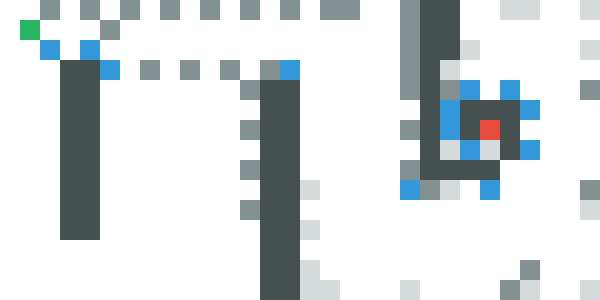

{'time': 0.001141959999998221,
 'found': True,
 'length': 39.79898987322332,
 'created': 64,
 'complex': 0}

In [14]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

In [15]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # . # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . # . . . .
. . . # # . . . . . . . . # # . . # # # # # # # # . . . . . 
. . . # # . . . . . . . . # # . . # . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . # . . . . . # # # # # . . 
. . . # # . . . . . . . . # # . . # . . . . . # . . . . . . 
. . . . . . . . . . . . . # # . # # . . . . . # . . . . . . 
. . . . . . . . . . . . . # # . . . # . # . # . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 6
jGoal = 24

In [16]:
startNode = Node(iStart, jStart)
goalNode = Node(iGoal, jGoal)
grid = GridMap().readFromString(mapstr, width, height)

Preprocess the map: 100%|██████████| 450/450 [00:04<00:00, 108.26it/s]


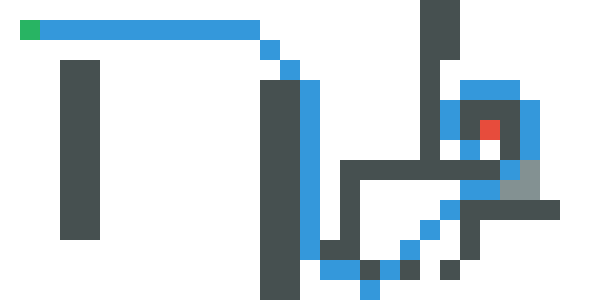

{'time': 0.0011166579999866144,
 'found': True,
 'length': 48.627416997969505,
 'created': 46,
 'complex': 0}

In [17]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

Preprocess the map: 100%|██████████| 450/450 [00:04<00:00, 99.45it/s] 


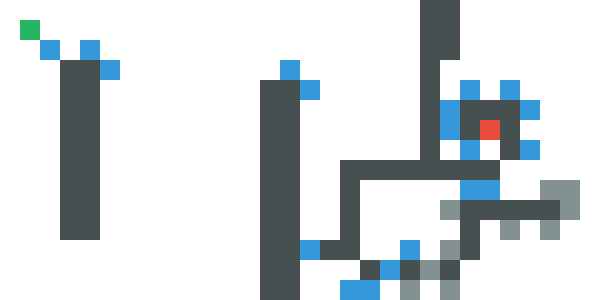

{'time': 0.0033490529999937735,
 'found': True,
 'length': 48.62741699796951,
 'created': 31,
 'complex': 0}

In [18]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

Preprocess the map: 100%|██████████| 450/450 [00:04<00:00, 94.60it/s] 


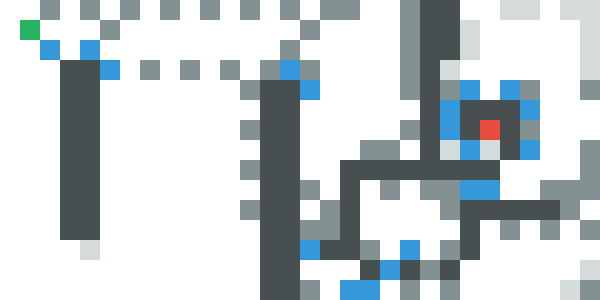

{'time': 0.00195977200000641,
 'found': True,
 'length': 48.62741699796951,
 'created': 93,
 'complex': 0}

In [19]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)